<a href="https://colab.research.google.com/github/alzimna/Portfolio/blob/main/Independence%20Test/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

Diberikan data EPS,PE,ROA,ROE, dan BV dari 45 saham yang masuk ke dalam indeks LQ45 seperti pada tabel berikut.

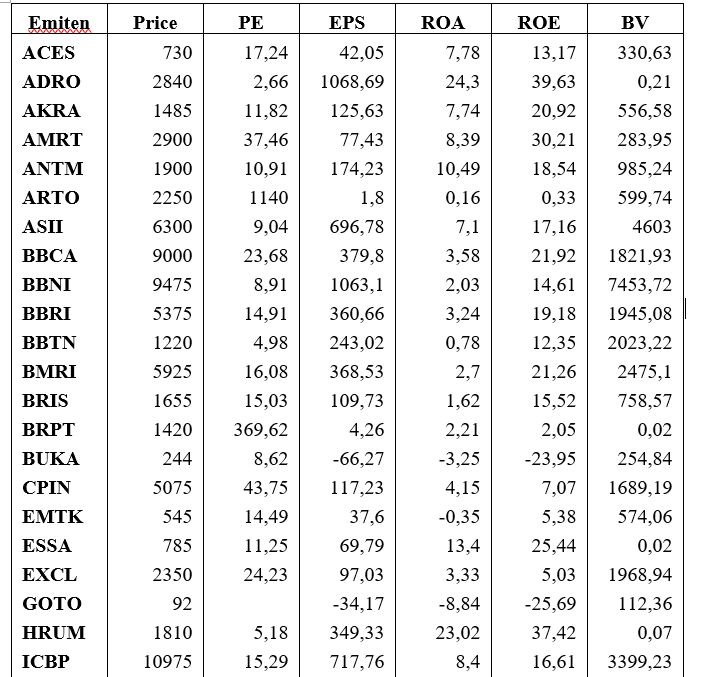

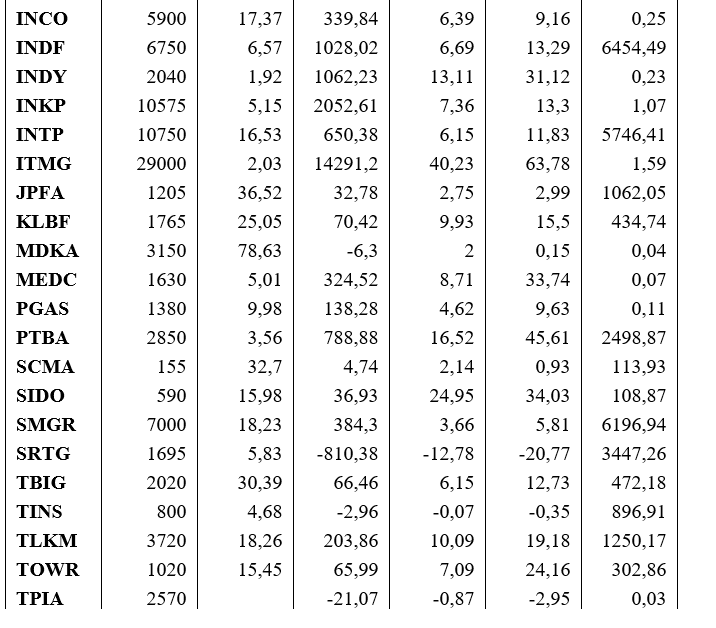

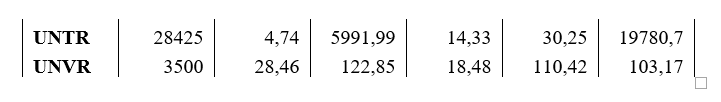

Pada projek ini kita akan melihat apakah pada data diatas variabel Book Value (BV) bergantung pada EPS, ROA, dan ROE. Dengan kata lain, akan dilakukan uji independensi untuk melihat apakah BV independen dengan variabel EPS, ROA, dan ROE.

# **Project Method**
Metode yang digunakan pada projek ini adalah materi Bab 7 pada buku "*Methods of Multivariate Analysis*", Oleh  ALVIN C. RENCHER yaitu uji independensi dengan menggunakan matriks covariance. Pada projek ini digunakan bahasa pemrograman R.

# **Code Snippet**

In [1]:
install.packages('matlib')
library("matlib")
library(httr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’




In [2]:
github_link <- "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Independence%20Test/kontekstual1.xlsx"
temp_file <- tempfile(fileext = ".xlsx")
req <- GET(github_link,
          # authenticate using GITHUB_PAT
           authenticate(Sys.getenv("GITHUB_PAT"), ""),
          # write result to disk
           write_disk(path = temp_file))
data = readxl::read_excel(temp_file)
head(data)

EPS,ROA,ROE,BV
<dbl>,<dbl>,<dbl>,<dbl>
42.05,7.78,13.17,330.63
1068.69,24.30,39.63,0.21
125.63,7.74,20.92,556.58
77.43,8.39,30.21,283.95
174.23,10.49,18.54,985.24
1.80,0.16,0.33,599.74


Selanjutnya dari data diatas diambil variabel EPS,ROA,ROE,BV misalkan
    
\begin{align*}
    y_1 &: \text{EPS}\\
    y_2 &: \text{ROA}\\
    y_3 &: \text{ROE}\\
    x_1 &: \text{BV}\\
\end{align*}

Dari sini akan dilakukan uji independensi pada dua grup yaitu $\{y_1,y_2,y_3\}$ dan $\{x_1\}$.

Diperhatikan uji hipotesis dengan
$$
    H_0 : \pmb{\Sigma}_{yx} = \pmb{O}
$$

In [4]:
Y = data
S = round(cov(Y),4)
Sxx = round(cov(Y[,c(4)]),4)
Syy = round(cov(Y[,c(1,2,3)]),4)
cat("S = \n")
print(S)

S = 
           EPS        ROA        ROE            BV
EPS 5198471.46 12773.7691 19360.4266  2025610.5491
ROA   12773.77    81.8483   158.5766     -718.9616
ROE   19360.43   158.5766   490.3548       85.3620
BV  2025610.55  -718.9616    85.3620 11293968.8523


Diperoleh matriks kovariansi sebagai berikut
$$
    \textbf{S} = \left(
    \begin{array}{cc}
         \textbf{S}_{yy} & \textbf{S}_{yx}  \\
         \textbf{S}_{xy} &
         \textbf{S}_{xx}
    \end{array}
    \right) =
    \left(
    \begin{array}{ccc|c}
    5198471.46 & 12773.7691 & 19360.4266 & 2025610.5491 \\
    12773.77  &  81.8483 & 158.5766 & -718.9616\\
    19360.43  & 158.5766 &  490.3548  & 85.3620\\
    \hline
    2025610.55 & -718.9616  &  85.3620 & 11293968.8523
    \end{array}
    \right)
$$

In [5]:
Lambda = det(S)/(det(Syy)*det(Sxx))
cat("Lambda = ", Lambda)

Lambda =  0.8600895

Selanjutnya diperoleh nilai
$$
    \Lambda_{\text{hitung}} = \frac{|\textbf{S}|}{|\textbf{S}_{yy}||\textbf{S}_{xx}|} = \frac{4.4353 \times 10^{17}}{(45659666061)(11293969)} = 0.8600895
$$
    

Nilai uji statistik yang digunakan adalah $\Lambda_{\alpha,p,q,n-1-q}$ dengan
\begin{align*}
        \alpha & = 0.05\\
        p &= 1\\
        q &= v_H = 3\\
        n-1-q &= 45-1-3 = 41
\end{align*}
    
Dari tabel A.9 diperoleh
    $$
    \Lambda_{\text{tabel}} = \Lambda_{0.05,1,3,40} = 0.824
    $$
    
Karena $\Lambda_{\text{hitung}} > \Lambda_{\text{tabel}}$ maka $H_0$ tidak ditolak yang artinya $\pmb{\Sigma}_{yx} = \pmb{O}$. Dengan kata lain **nilai BV dari perusahaan pada LQ45 independen atau tidak bergantung dengan EPS,ROA, dan ROE.**